# Intro example to machine learning

BMED360-2021  `01-intro-example.ipynb`

<a href="https://colab.research.google.com/github/computational-medicine/BMED360-2021/tree/main/Lab2-ML-tissue-classification/01-intro-example.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Learning outcome:

The goal of this notebook is to introduce some of the basic ingredients and techniques in machine learning.<br>
We'll use a much studied, classical data set: [Iris flower data set](https://archive.ics.uci.edu/ml/datasets/iris)

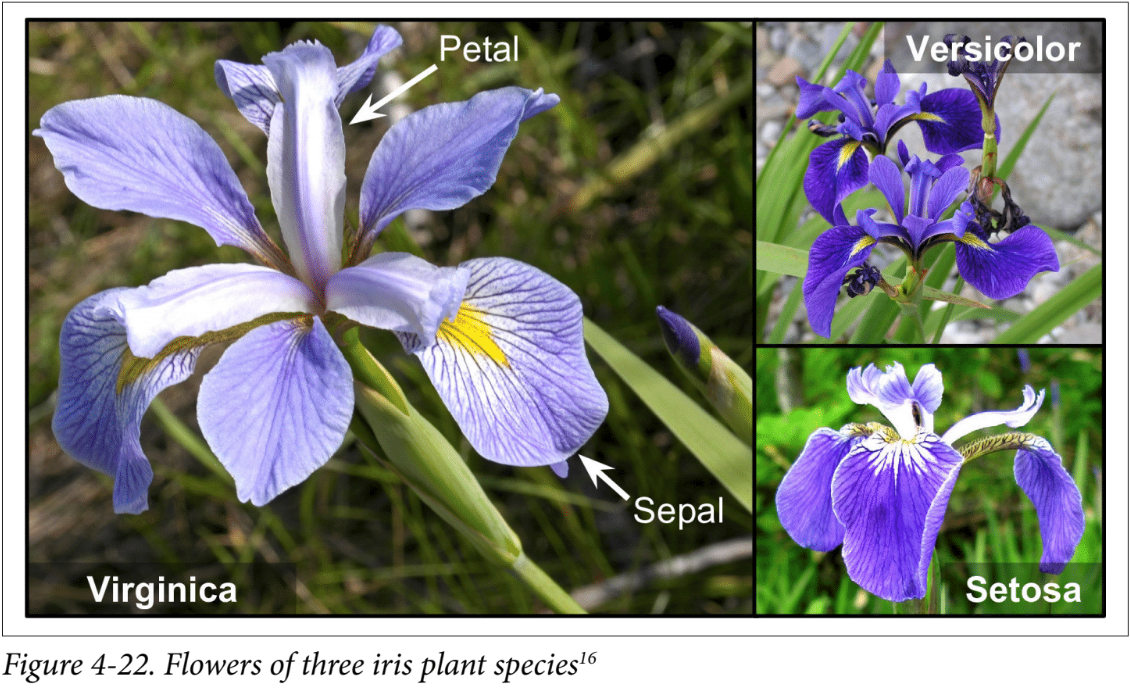

In [94]:
import IPython
IPython.display.Image("./assets/iris.png", width="60%")

The task is to predict the Iris species, denoted $y$ , i.e. Iris-Setosa, Iris-Versicolor or Iris-Virginica from measurements, denoted $X$.

### For using Colab
**--> (some of) the following libraries must be `pip installed` (i.e. uncommet these among the following pip commands):**

In [95]:
# These might not be necessary to pip install on colab:
#!pip install matplotlib
#!pip install gdown
#!pip install sklearn

**Download zipped data from Google Drive using** [`gdown`](https://github.com/wkentaro/gdown)

In [96]:
import gdown
import shutil
import os
import sys

In [97]:
# Download zip-file if ./assets does not exist (as when running in Colab)

if os.path.isdir('./assets') == False:
    
    ## Download assets.zip for Google Drive        
    # https://drive.google.com/file/d/18lUwfxqtWD6BB9WiQKzzSr6RoBcysSqr/view?usp=sharing       
    file_id = '18lUwfxqtWD6BB9WiQKzzSr6RoBcysSqr'
    url = 'https://drive.google.com/uc?id=%s' % file_id
    output = './assets.zip'
    gdown.download(url, output, quiet=False)
    
    ## Unzip the assets file into `./assets`
    shutil.unpack_archive(output, '.')
    
    ## Delete the `assets.zip` file
    os.remove(output)
else:
    print(f'./assets  exists already!')

./assets  exists already!


# Setup

In [98]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn # scikit-learn for most ML work (except for deep learning)

In [99]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)
print('Matplotlib version ' + matplotlib.__version__)
print('Seaborn version ' + sns.__version__)
print('Scikit-learn version ' + sklearn.__version__)

Python version 3.8.0 | packaged by conda-forge | (default, Nov 22 2019, 19:11:19) 
[Clang 9.0.0 (tags/RELEASE_900/final)]
Pandas version 1.2.4
Numpy version 1.19.5
Matplotlib version 3.4.1
Seaborn version 0.11.1
Scikit-learn version 0.24.1


In [100]:
# To make the notebook reproducible, we set the random seed
np.random.seed(42)

You should include the following in all your notebooks.

In [101]:
%matplotlib inline

> **Your turn:** Read about these and other magic commands by running %magic in a code cell. You can uncomment the command below and run the cell using Shift+Enter.

In [102]:
#%magic

We'll use scikit-learn for most of the hands-on parts of BMED360 (except when we get to deep learning):

# Prepare the data - read and explore (EDA)

In [103]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

**List of available *features* in the data set:**

In [104]:
features = iris_dataset['feature_names']
print(f"Features: {features}")

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**List of predefined *labels*:**

In [105]:
print(f"Labels: {iris_dataset['target_names']}")

Labels: ['setosa' 'versicolor' 'virginica']


**Read the `iris_dataset` into a Pandas dataframe**

In [106]:
iris_df = pd.DataFrame(iris_dataset['data'], columns=features)
iris_df['label'] = iris_dataset['target']

In [107]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Show the Iris data description

In [108]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [109]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Ex. What's the sample size of the iris dataset? 

In [110]:
# %load solutions/ex1_0.py

## Look at the feature distribution among the iris species

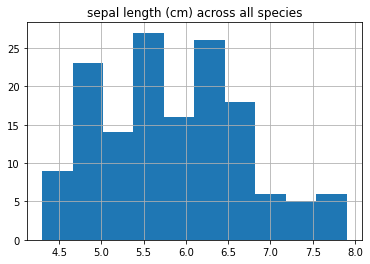

In [111]:
# The distribution of a specified feature for all the plants
feat = 'sepal length (cm)'
iris_df[feat].hist()
plt.title(feat+' across all species')
plt.show()

**Scatter plots** can tell us how the various features differ among the different plants:

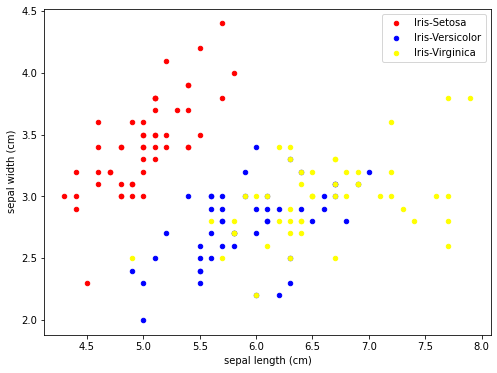

In [112]:
# Scatter plot for sepal length versus sepal width, colored by the plant class:

ax = iris_df[iris_df['label'] == 0].plot.scatter(x='sepal length (cm)', y='sepal width (cm)', 
                                                    color='red', label='Iris-Setosa', figsize=(8,6))

iris_df[iris_df['label'] == 1].plot.scatter(x='sepal length (cm)', y='sepal width (cm)', 
                                                    color='blue', label='Iris-Versicolor', ax=ax)

iris_df[iris_df['label'] == 2].plot.scatter(x='sepal length (cm)', y='sepal width (cm)', 
                                                    color='yellow', label='Iris-Virginica', ax=ax)

plt.show()

Pandas can actually create these plots for us for each pair of features in the data frame. We color the dots by their label using c = iris_df['label'], or a more explicit method as below. More information at https://www.marsja.se/pandas-scatter-matrix-pair-plot

In [113]:
# Specify a colortable list
colors = []
cols = ['red', 'blue', 'yellow']
for i in range(iris_df.shape[0]):
    colors.append(cols[iris_df['label'][i]])  

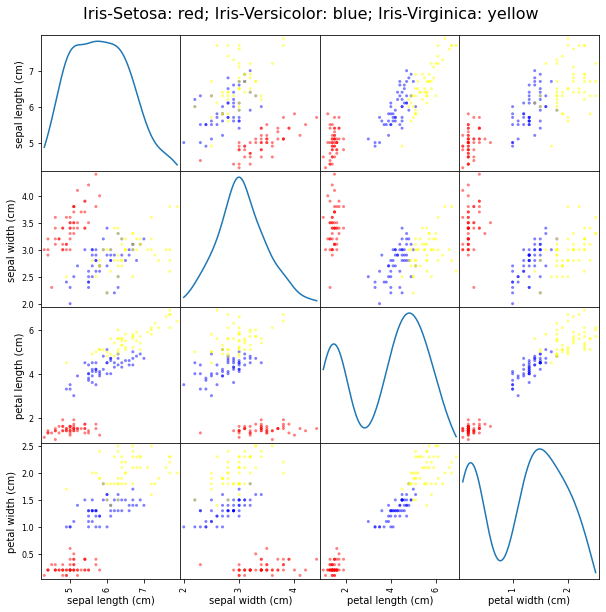

In [114]:
pd.plotting.scatter_matrix(iris_df.loc[:, iris_df.columns != 'label'], 
                           diagonal='kde', color = colors, # iris_df['label']
                           figsize=(10,10))

plt.suptitle("Iris-Setosa: red; Iris-Versicolor: blue; Iris-Virginica: yellow", fontsize=16, y=0.92)
plt.show()

**Display the data $X$ (not the labels $y$)**

In [115]:
iris_df.loc[:, iris_df.columns != 'label']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


**Labels** (numeric and textual)

In [116]:
iris_df.label.unique()

array([0, 1, 2])

0 means Setosa, 1 is Versicolor and 2 is Virginica (remember that Python lists are indexed starting from 0):

In [117]:
class_names = list(iris_dataset['target_names'])
class_names

['setosa', 'versicolor', 'virginica']

Or, combined (class_number, class_label):

In [118]:
y = iris_dataset['target']
labs = list(zip(range(len(y)), iris_dataset['target_names']))
labs

[(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]

## Plotting for explorative data analysis

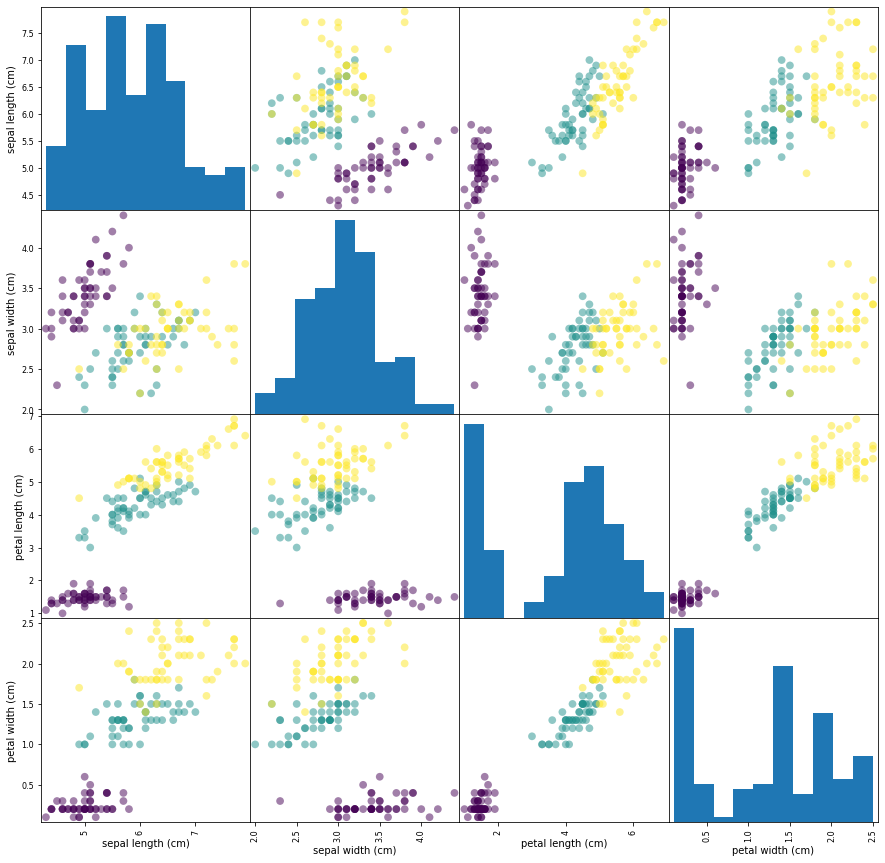

In [119]:
scm = pd.plotting.scatter_matrix(iris_df[features], 
                           diagonal='hist',
                           c=iris_df['label'], 
                           figsize=(15,15), 
                           marker='o', 
                           s=60)
plt.show()

We observe that the colors are highly separated. **To successfully train a machine learning model to distinguish the classes therefore seems promising!**

> Visualization of data forms a crucial part of applied machine learning. Carefully designed plots can reveal patterns in the data, patterns we can exploit when constructing predictive machine learning models.

> **Your turn!** To get a feeling for the many different ways you can visualize data, have a quick look at the example gallery of the Python library seaborn: https://seaborn.pydata.org/examples/index.html. Feel free to play around with the examples. Here's a guide to the plotting features of Pandas, also worth a look: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html. You'll make use of these throughout the course.

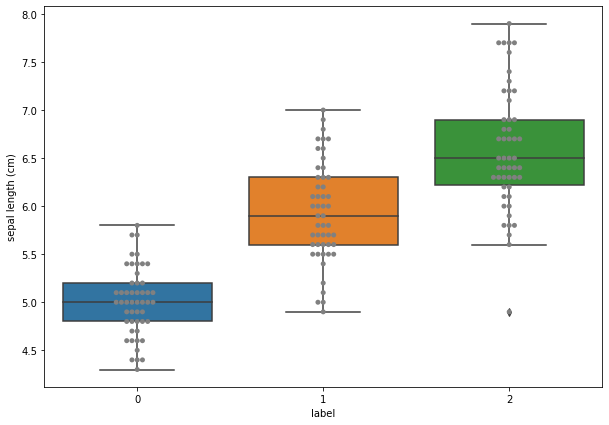

In [120]:
plt.figure(figsize = (10,7))

# Usual boxplot
ax = sns.boxplot(x='label', y='sepal length (cm)', data=iris_df)
 
# Add jitter with the swarmplot function.
ax = sns.swarmplot(x='label', y='sepal length (cm)', data=iris_df, color="gray")

# Classification

We have access to two different measurements (**sepal length** and **sepal width**) for 150 samples. From these feature denoted as (and stored in)  $X$  the task is to predict the correct label, denoted  $y$, i.e.

<span style="font-size:Larger;">$$y \approx f(X;\theta)$$</span>

where  $f$  is the model (e.g. [RandomForest](https://en.wikipedia.org/wiki/Random_forest)) and  $\theta$  are the model parameters to be learnt from data.

# Split the data in a training set and a test set

In [121]:
from sklearn.model_selection import train_test_split  # default 75% / 25 %

In [122]:
iris_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [123]:
# Uncomment for documentation:
# train_test_split?

In the Sklearn implementation, we first separate the X (features), i.e the first two columns of `iris_dataset['data']` from y (target), then feed those two into the function.
#### Ex1_1. assign the relevant values to X and y (but only the two first features of X).

In [124]:
# %load solutions/ex1_1.py

In [125]:
print(X.shape, y.shape)

(150, 2) (150,)


### Usually before you do any machine learning, you inspect the data, preferably visually. 

In this example we are using only 2 features. Our data contains 4 features in total, so plotting is not without tradeoff, but it demonstrates something important. 

In [126]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')

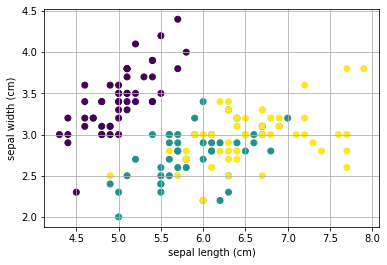

In [127]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel(iris_df.columns[0])
plt.ylabel(iris_df.columns[1])
plt.grid(True)
plt.show()

**Make the split and find the shapes of the train and test datasets:**

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

for d in X_train, X_test, y_train, y_test:
    print (d.shape)

(112, 2)
(38, 2)
(112,)
(38,)


Now the task becomes trivial: all we have to do is to draw a line to separate the dots of different color (i.e. species). This can be done easily for the purple class, while the others are largely overlapping. Don't forget though that there are a total of 4 features, so perhaps they all are separable using all the features (but we can't visually see it). This abstract space of features in which the samples resides are referred to as **feature space**.

**Idea**: just classify a sample based on whoever is its closest neighbors. This is known as K-nearest neighbors (KNN), the simplest supervised ML algorithm.

### A quick note on ML in practice.
The largest general-purpose ML library in Python is scikit-learn (sklearn). Working with a ML model is divided into 3 steps: 
- choose a model and instantiate it.
- train the model using the `fit` method.
- evaluate the model by predicting left out test data, and comparing your prediction to the ground truth.

In [129]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [130]:
model = KNN(n_neighbors=5) # define the model and specify hyperparameters
model.fit(X_train, y_train) # train the model
preds = model.predict(X_test) # predict on the unseen data

#### Ex1.2. Provide the accuracy of your model (percentage of correct predictions) on the test data.

In [131]:
# %load solutions/ex1_2.py
np.mean((preds == y_test).astype(int))

0.8157894736842105

Most ML models of Sklearn happen to have a `score` method, which will do the evaluation for you. The default metric is **accuracy**.

In [132]:
test_score = model.score(X_test, y_test)
train_score = model.score(X_train, y_train)
print(f"test score: {test_score} \ntrain score: {train_score}")

test score: 0.8157894736842105 
train score: 0.8214285714285714


## Feature scaling

So far we have done minimal preprocessing. With few exceptions, you should always do some basic preprocessing, like standardizing each input feature to zero mean and unit variance. In fact, you should never do KNN without standardizing the input first. `Sklearn` has a great functionality, and offers a vast number of options for preproccesing in the `preprocessing` sub module.

#### Why scale the features?
Especially in algorithms like KNN, it is the distance between data points that determine the prediction. If the unit of one feature is on the range (0-1000), that feature would totally dominate the total distance between two points. Empirically, feature scaling also enhances performance, and sometimes speed.

In [133]:
from sklearn.preprocessing import StandardScaler # this will centre the data and give it unit variance.

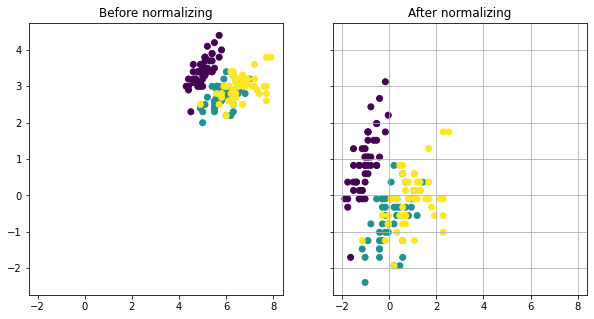

In [134]:
scaler = StandardScaler() # instantiate the scaler
scaler.fit(X_train) # fit only the training set
X_scaled = scaler.transform(X) # puts the values of X onto another interval

fig, ax = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True) # make two plots on the same row
ax[0].scatter(X[:,0], X[:,1], c=y)
ax[0].set_title('Before normalizing') # set the title of the first subplot
ax[1].scatter(X_scaled[:,0], X_scaled[:,1], c=y) 
ax[1].set_title('After normalizing') # set the title of the second subplot
ax[1].grid(True)
plt.show()

### Depict the desicioon boundaries

In [135]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y):
    """
    X : input data
    y : input labels
    clf : the sklearn classifier
    
    """
    h = .05 
    # Define some custom colors
    cmap_light = ListedColormap(['orange', 'pink', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'red', 'darkblue'])
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [136]:
# Suppress anoyiong warnings
import warnings
warnings.filterwarnings("ignore")

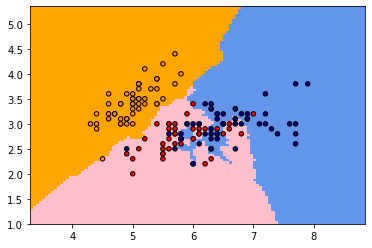

In [137]:
plot_decision_boundary(model, X, y)

#### Ex1.3. Vary the number of neighbors in your model, retrain, and plot with title `k`. (e.g. write a loop)

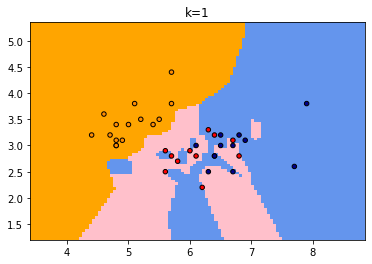

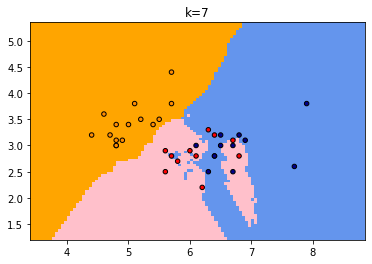

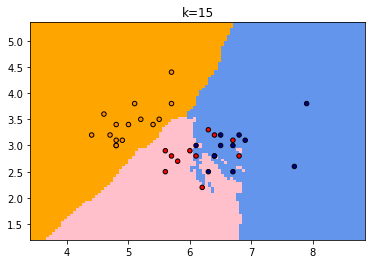

In [138]:
# %load solutions/ex1_3.py
for k in [1, 7, 15]:
    clf = KNN
    clf.fit
    plot_decision_boundary(clf, X_test, y_test)
    plt.title(f'k={k}')
plt.show()

#The decision boundary is more fine-grained for small Ks.

# Select another model than KNN

## Here a random forest classifier
Explained [[here](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)] and [[here](https://machinelearningmastery.com/random-forest-ensemble-in-python)] and [[here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)]

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
rf = RandomForestClassifier(random_state=42, n_estimators=100) # random_state for reproducibility

As you see, there are a bunch of parameters to choose in a RandomForestClassifier:

In [141]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Train the model
Notably, decision tree based methods are not affected by feature scaling (they are unique in this regard).

In [142]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [143]:
y_pred = rf.predict(X_test)

# Explore the results on the (previously unseen) test dataset

## Accuracy, precision and recall 
Explained [[here](https://en.wikipedia.org/wiki/Precision_and_recall)]

In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('accuracy:', accuracy_score(y_test, y_pred).round(3))
print('precision:', precision_score(y_test, y_pred, average='macro').round(3))
print('recall:', recall_score(y_test, y_pred, average='macro').round(3))

accuracy: 0.789
precision: 0.768
recall: 0.768


## Confusion matrix
Explained [[here](https://en.wikipedia.org/wiki/Confusion_matrix)]

In [145]:
from utils import plot_confusion_matrix, plot_confusion_matrix_with_colorbar

In [146]:
class_names = iris_dataset['target_names']

In [147]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[15  0  0]
 [ 0  7  4]
 [ 0  4  8]]


Using the plot confusion function in `utils.py`

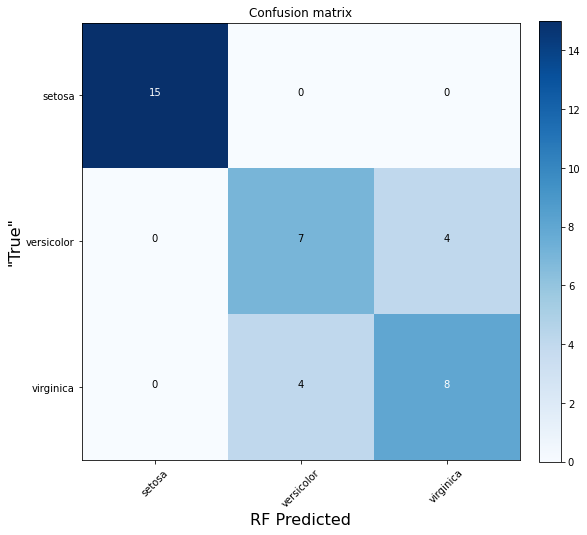

In [148]:
plot_confusion_matrix_with_colorbar(cm, classes=class_names, title='Confusion matrix', figsize=(8,8))
plt.ylabel('"True"')
plt.xlabel('RF Predicted')
plt.show()

Or, using Seaborn's `heatmap`:

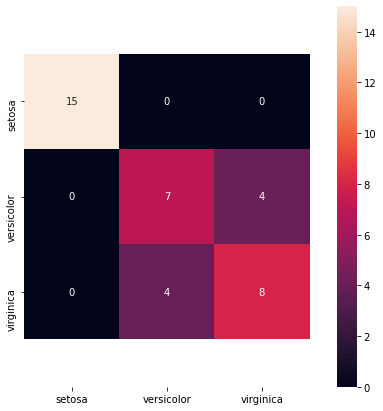

In [149]:
df_cm = pd.DataFrame(cm, index = [i for i in class_names],
                  columns = [i for i in class_names])

plt.figure(figsize = (10,7))
ax=sns.heatmap(df_cm, annot=True, fmt='d', square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Here are two alternative plots for the explorative data analysis

> **Your turn!**  For å få en følelse av de mange teknikker som finnes for å visualisere data, ta en kjapp titt på eksempel-galleriet til Python-biblioteket seaborn: https://seaborn.pydata.org/examples/index.html. Det er fritt frem å leke med eksemplene. Her er en guide til plotte-funksjonaliteten i Pandas som også er verdt en titt: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html.

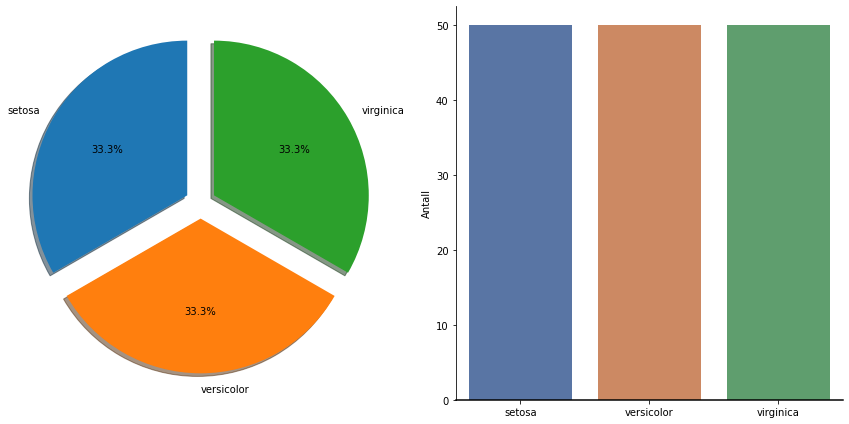

In [150]:
import seaborn as sns

_, counts = np.unique(iris_dataset['target'], return_counts=True) # Number of flowers from each species
labels = iris_dataset['target_names'] # Name on species

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Pie chart:
ax1.pie(counts, explode=[0.1, 0.1, 0.1], labels=labels, startangle=90, autopct='%1.1f%%', shadow=True)

# Bar plot:
sns.barplot(x=labels, y=counts, palette="deep", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Antall")
sns.despine(bottom=True)

# Show plots
plt.tight_layout(h_pad=2)

## ... and the complete code for Random forest classification

In [151]:
# Load the data and split into data and labels
iris_dataset = load_iris()
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import and train a machine learning model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

0.7894736842105263

# Exercises for further learning

> **Your turn!**
- Get the feature importances for the Iris predictions. Is it sepal length or width that provides the most information?
- Construct another random forest by changing the `random_state`. What happens to the accuracy? What happens to the feature imporances?
- Try to create a better random forest by tuning the parameters. If you want to dive deep, use `grid_search` (http://scikit-learn.org/stable/modules/grid_search.html) to automatically find good parameters. 
- Try another classification model. 
- **Extra challenge**: Here's another well-prepared data set: https://assets.datacamp.com/production/course_1939/datasets/auto.csv. Download it and repeat the procedure above. This time the goal is to predict the country of origin of a car given various features. 